In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
import requests
requests.__version__

'2.24.0'

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b02c17c8a755f4cb5e5080799e5bd79c


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 1 | wajima
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | honningsvag
Processing Record 7 of Set 1 | tabarqah
City not found. Skipping...
Processing Record 8 of Set 1 | sao filipe
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 12 of Set 1 | anshun
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | souillac
Processing Record 15 of Set 1 | kenora
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | new norfolk
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | 

Processing Record 33 of Set 4 | chabahar
Processing Record 34 of Set 4 | eureka
Processing Record 35 of Set 4 | shelburne
Processing Record 36 of Set 4 | lata
Processing Record 37 of Set 4 | nuuk
Processing Record 38 of Set 4 | road town
Processing Record 39 of Set 4 | dabra
Processing Record 40 of Set 4 | noumea
Processing Record 41 of Set 4 | nouadhibou
Processing Record 42 of Set 4 | ancud
Processing Record 43 of Set 4 | manati
Processing Record 44 of Set 4 | lisakovsk
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | pangnirtung
Processing Record 48 of Set 4 | placido de castro
Processing Record 49 of Set 4 | vung tau
Processing Record 50 of Set 4 | marsh harbour
Processing Record 1 of Set 5 | xichang
Processing Record 2 of Set 5 | ierapetra
Processing Record 3 of Set 5 | tukrah
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | kavieng
Processing Record 6 of Set 5 | luwuk
Processing Record 7 of Set 5 | co

Processing Record 27 of Set 8 | ambilobe
Processing Record 28 of Set 8 | chicama
Processing Record 29 of Set 8 | port keats
Processing Record 30 of Set 8 | waitati
Processing Record 31 of Set 8 | bonavista
Processing Record 32 of Set 8 | jambi
Processing Record 33 of Set 8 | flinders
Processing Record 34 of Set 8 | dakar
Processing Record 35 of Set 8 | mozarlandia
Processing Record 36 of Set 8 | birjand
Processing Record 37 of Set 8 | broome
Processing Record 38 of Set 8 | smirnykh
Processing Record 39 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 40 of Set 8 | bungu
Processing Record 41 of Set 8 | bulgan
Processing Record 42 of Set 8 | orlik
Processing Record 43 of Set 8 | amos
Processing Record 44 of Set 8 | thompson
Processing Record 45 of Set 8 | pyay
Processing Record 46 of Set 8 | broken hill
Processing Record 47 of Set 8 | ostrovnoy
Processing Record 48 of Set 8 | porto velho
Processing Record 49 of Set 8 | castro
Processing Record 50 of Set 8 | surt
Processin

Processing Record 13 of Set 12 | pangody
Processing Record 14 of Set 12 | ekibastuz
Processing Record 15 of Set 12 | manicore
Processing Record 16 of Set 12 | bonthe
Processing Record 17 of Set 12 | chaplynka
Processing Record 18 of Set 12 | vanimo
Processing Record 19 of Set 12 | caronport
Processing Record 20 of Set 12 | alyangula
Processing Record 21 of Set 12 | honiara
Processing Record 22 of Set 12 | kirakira
Processing Record 23 of Set 12 | paulo afonso
Processing Record 24 of Set 12 | tarudant
City not found. Skipping...
Processing Record 25 of Set 12 | silchar
Processing Record 26 of Set 12 | ulverstone
Processing Record 27 of Set 12 | teknaf
Processing Record 28 of Set 12 | gemena
Processing Record 29 of Set 12 | dryden
Processing Record 30 of Set 12 | katiola
Processing Record 31 of Set 12 | mabaruma
Processing Record 32 of Set 12 | buin
Processing Record 33 of Set 12 | salta
Processing Record 34 of Set 12 | fez
Processing Record 35 of Set 12 | grand gaube
Processing Record 3

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Wajima,37.40,136.90,53.29,60,87,12.64,JP,2020-10-29 21:03:21
1,Butaritari,3.07,172.79,82.18,73,48,12.08,KI,2020-10-29 21:01:53
2,Rikitea,-23.12,-134.97,74.86,76,57,11.92,PF,2020-10-29 21:03:21
3,Arraial Do Cabo,-22.97,-42.03,77.00,94,90,4.70,BR,2020-10-29 21:00:34
4,Honningsvag,70.98,25.97,37.40,64,75,13.87,NO,2020-10-29 21:03:21
5,Sao Filipe,14.90,-24.50,81.25,68,0,8.81,CV,2020-10-29 21:02:02
6,Bluff,-46.60,168.33,62.01,82,100,1.01,NZ,2020-10-29 21:02:03
7,Hilo,19.73,-155.09,84.20,62,75,5.82,US,2020-10-29 20:59:06
8,Anshun,26.25,105.93,55.29,90,100,1.12,CN,2020-10-29 21:03:21
9,Bredasdorp,-34.53,20.04,53.60,58,5,8.05,ZA,2020-10-29 21:03:22


In [12]:
#reordering dataframe 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wajima,JP,2020-10-29 21:03:21,37.40,136.90,53.29,60,87,12.64
1,Butaritari,KI,2020-10-29 21:01:53,3.07,172.79,82.18,73,48,12.08
2,Rikitea,PF,2020-10-29 21:03:21,-23.12,-134.97,74.86,76,57,11.92
3,Arraial Do Cabo,BR,2020-10-29 21:00:34,-22.97,-42.03,77.00,94,90,4.70
4,Honningsvag,NO,2020-10-29 21:03:21,70.98,25.97,37.40,64,75,13.87
5,Sao Filipe,CV,2020-10-29 21:02:02,14.90,-24.50,81.25,68,0,8.81
6,Bluff,NZ,2020-10-29 21:02:03,-46.60,168.33,62.01,82,100,1.01
7,Hilo,US,2020-10-29 20:59:06,19.73,-155.09,84.20,62,75,5.82
8,Anshun,CN,2020-10-29 21:03:21,26.25,105.93,55.29,90,100,1.12
9,Bredasdorp,ZA,2020-10-29 21:03:22,-34.53,20.04,53.60,58,5,8.05


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604005466.3678174

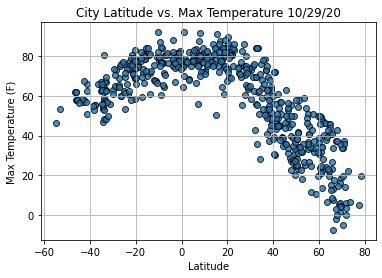

In [16]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

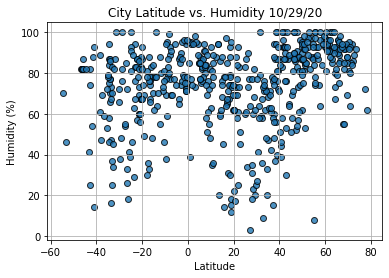

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

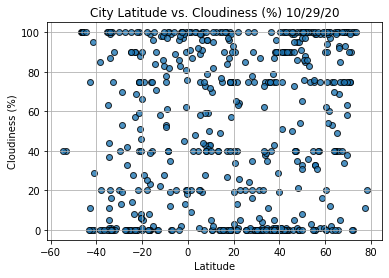

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

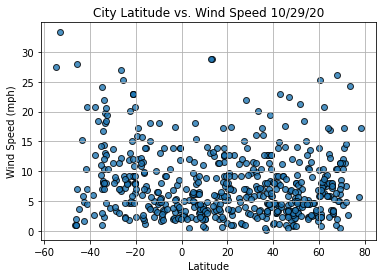

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Wajima,JP,2020-10-29 21:03:21,37.40,136.90,53.29,60,87,12.64
1,Butaritari,KI,2020-10-29 21:01:53,3.07,172.79,82.18,73,48,12.08
4,Honningsvag,NO,2020-10-29 21:03:21,70.98,25.97,37.40,64,75,13.87
5,Sao Filipe,CV,2020-10-29 21:02:02,14.90,-24.50,81.25,68,0,8.81
7,Hilo,US,2020-10-29 20:59:06,19.73,-155.09,84.20,62,75,5.82
...,...,...,...,...,...,...,...,...,...
541,Tura,IN,2020-10-29 21:04:27,25.52,90.22,71.13,87,0,4.79
542,Porvoo,FI,2020-10-29 21:04:27,60.39,25.67,46.00,100,20,5.82
544,Semey,KZ,2020-10-29 21:04:27,50.41,80.23,38.44,75,100,14.00
545,Lhokseumawe,ID,2020-10-29 21:03:57,5.18,97.15,77.59,85,99,6.53


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

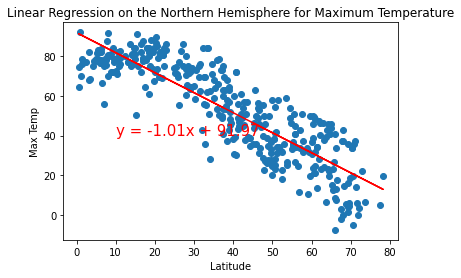

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plt.title('Linear Regression on the Northern Hemisphere for Maximum Temperature')
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

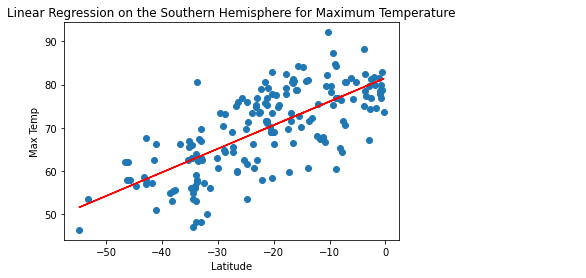

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plt.title('Linear Regression on the Southern Hemisphere for Maximum Temperature')
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

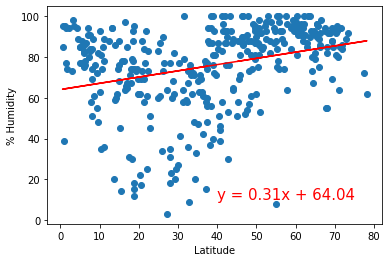

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

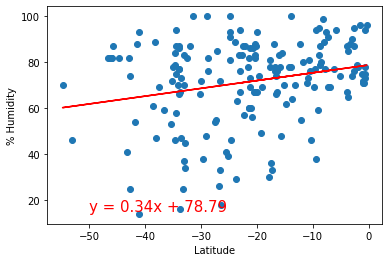

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

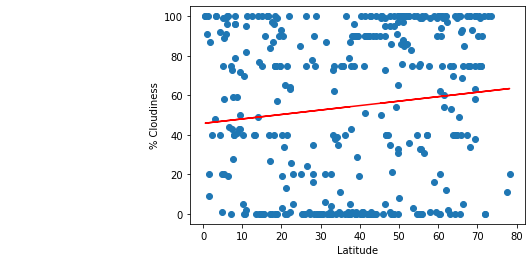

In [29]:
# Linear regression on the northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

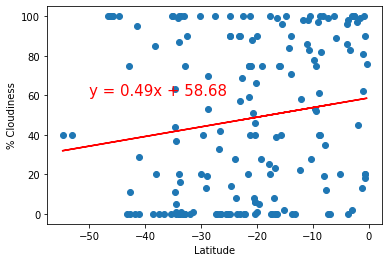

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

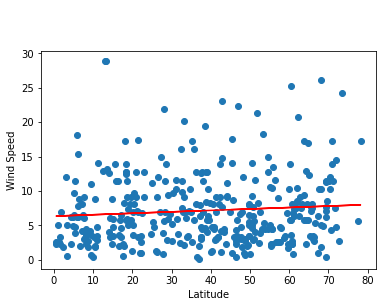

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

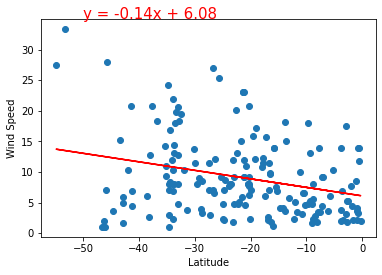

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))

# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 